In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
data = pd.read_csv("sales_data.csv")

In [51]:
data.head(5)

,sr.no,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,2,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,3,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,4,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,5,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [52]:
data.shape

(1000, 15)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sr.no                 1000 non-null   int64  
 1   Product_ID            1000 non-null   int64  
 2   Sale_Date             1000 non-null   object 
 3   Sales_Rep             1000 non-null   object 
 4   Region                1000 non-null   object 
 5   Sales_Amount          1000 non-null   float64
 6   Quantity_Sold         1000 non-null   int64  
 7   Product_Category      1000 non-null   object 
 8   Unit_Cost             1000 non-null   float64
 9   Unit_Price            1000 non-null   float64
 10  Customer_Type         1000 non-null   object 
 11  Discount              1000 non-null   float64
 12  Payment_Method        1000 non-null   object 
 13  Sales_Channel         1000 non-null   object 
 14  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(3

In [54]:
data.describe()

,sr.no,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,288.819436,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1.000000,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,250.750000,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,500.500000,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,750.250000,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1000.000000,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [55]:
data.columns =data.columns.str.lower().str.replace(" ","_")

In [56]:
data.columns

Index(['sr.no', 'product_id', 'sale_date', 'sales_rep', 'region',
       'sales_amount', 'quantity_sold', 'product_category', 'unit_cost',
       'unit_price', 'customer_type', 'discount', 'payment_method',
       'sales_channel', 'region_and_sales_rep'],
      dtype='object')

In [57]:
#check null values
data.isnull().sum()

sr.no                   0
product_id              0
sale_date               0
sales_rep               0
region                  0
sales_amount            0
quantity_sold           0
product_category        0
unit_cost               0
unit_price              0
customer_type           0
discount                0
payment_method          0
sales_channel           0
region_and_sales_rep    0
dtype: int64

In [58]:
data.dtypes

sr.no                     int64
product_id                int64
sale_date                object
sales_rep                object
region                   object
sales_amount            float64
quantity_sold             int64
product_category         object
unit_cost               float64
unit_price              float64
customer_type            object
discount                float64
payment_method           object
sales_channel            object
region_and_sales_rep     object
dtype: object

In [59]:
num_cols = data.select_dtypes(include =['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

In [60]:
#column value standardization
for col in cat_cols :
    data[col] = data[col].str.strip().str.title()

In [61]:
data[['quantity_sold','unit_price']].describe()

,quantity_sold,unit_price
count,1000.000000,1000.000000
mean,25.355000,2728.440120
std,14.159006,1419.399839
min,1.000000,167.120000
25%,13.000000,1509.085000
50%,25.000000,2696.400000
75%,38.000000,3957.970000
max,49.000000,5442.150000


In [62]:
#filtering the invalid records
df = data[(data['quantity_sold']>0)&(data['unit_price']>0)]

In [63]:
df_clean = df.copy()

In [64]:
df_clean['discount_pct'] = df_clean['discount']*100

In [65]:
df_clean.head()

,sr.no,product_id,sale_date,sales_rep,region,sales_amount,quantity_sold,product_category,unit_cost,unit_price,customer_type,discount,payment_method,sales_channel,region_and_sales_rep,discount_pct
0,1,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,9.0
1,2,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,11.0
2,3,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,20.0
3,4,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,2.0
4,5,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,8.0


In [66]:
df_clean['total_sales'] = df_clean['quantity_sold']*df_clean['unit_price']

In [67]:
df_clean['discount_amount'] = df_clean['total_sales'] * df_clean['discount_pct']

In [68]:
df_clean['net_sales'] = df_clean['total_sales'] - df_clean['discount_pct']

In [69]:
df_clean['total_cost'] = df_clean['quantity_sold'] * df_clean['unit_cost']

In [70]:
df_clean['profit'] = df_clean['net_sales'] - df_clean['total_cost']

In [71]:
df_clean['profit_margin'] = df_clean['profit'] / df_clean['net_sales']

In [72]:
kpi_summary = {
    'Total Revenue': df_clean['net_sales'].sum(),
    'Total Profit': df_clean['profit'].sum(),
    'Average Profit Margin': df_clean['profit_margin'].mean(),
   
}

kpi_summary


{'Total Revenue': 70314701.71,
 'Total Profit': 6472608.07,
 'Average Profit Margin': 0.14196120834605727}

In [73]:
df_analysis = df_clean.copy()


In [74]:
df_analysis.describe()

,sr.no,product_id,sales_amount,quantity_sold,unit_cost,unit_price,discount,discount_pct,total_sales,discount_amount,net_sales,total_cost,profit,profit_margin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239,15.239000,70329.940710,1.064377e+06,70314.701710,63842.093640,6472.608070,0.141961
std,288.819436,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720,8.719972,57783.299413,1.191796e+06,57783.427939,55398.598783,5444.369613,0.153979
min,1.000000,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000,0.000000,211.180000,0.000000e+00,184.180000,60.280000,1.190000,0.001649
25%,250.750000,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000,8.000000,23363.535000,2.011601e+05,23344.785000,18591.320000,1880.985000,0.048113
50%,500.500000,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000,15.000000,54519.175000,6.382379e+05,54508.175000,48453.135000,5217.350000,0.093587
75%,750.250000,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000,23.000000,105855.845000,1.502813e+06,105850.595000,97755.397500,9924.332500,0.161865
max,1000.000000,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000,30.000000,252147.360000,6.733227e+06,252146.360000,235808.090000,23428.110000,0.841508


In [75]:
#category wise performance 
category_pref =(
    df_analysis.groupby('product_category').agg(
        total_revenue =('net_sales','sum'),
        total_profit =('profit','sum'),
        avg_profit_margin =('profit_margin','mean')
    ).sort_values('total_revenue',ascending= False)
)
                    

In [76]:
category_pref

,total_revenue,total_profit,avg_profit_margin
product_category,,,
Clothing,19282439.93,1708663.80,0.137598
Furniture,18326169.56,1775350.16,0.145053
Electronics,17567682.57,1570962.06,0.142327
Food,15138409.65,1417632.05,0.143181


In [77]:
df_analysis.groupby('product_id')['profit'].sum().sort_values().head(10) #top-10 loss making product

product_id
1065    13889.55
1031    17194.22
1011    17209.14
1043    17783.80
1098    19029.72
1070    19663.79
1079    28558.72
1068    28694.25
1022    29732.95
1076    32241.80
Name: profit, dtype: float64

In [78]:
df_analysis.groupby('product_id')['profit'].sum().sort_values(ascending= False).head(10)

product_id
1090    173546.04
1092    158523.48
1063    132912.92
1008    125469.57
1001    121693.31
1099    121287.99
1061    112784.73
1086    109102.20
1062    108926.89
1019    108661.36
Name: profit, dtype: float64

In [79]:
df_analysis

,sr.no,product_id,sale_date,sales_rep,region,sales_amount,quantity_sold,product_category,unit_cost,unit_price,...,payment_method,sales_channel,region_and_sales_rep,discount_pct,total_sales,discount_amount,net_sales,total_cost,profit,profit_margin
0,1,1052,03-02-2023,Bob,North,5053.97,18,Furniture,152.75,267.22,...,Cash,Online,North-Bob,9.0,4809.96,43289.64,4800.96,2749.50,2051.46,0.427302
1,2,1093,21-04-2023,Bob,West,4384.02,17,Furniture,3816.39,4209.44,...,Cash,Retail,West-Bob,11.0,71560.48,787165.28,71549.48,64878.63,6670.85,0.093234
2,3,1015,21-09-2023,David,South,4631.23,30,Food,261.56,371.40,...,Bank Transfer,Retail,South-David,20.0,11142.00,222840.00,11122.00,7846.80,3275.20,0.294479
3,4,1072,24-08-2023,Bob,South,2167.94,39,Clothing,4330.03,4467.75,...,Credit Card,Retail,South-Bob,2.0,174242.25,348484.50,174240.25,168871.17,5369.08,0.030814
4,5,1061,24-03-2023,Charlie,East,3750.20,13,Electronics,637.37,692.71,...,Credit Card,Online,East-Charlie,8.0,9005.23,72041.84,8997.23,8285.81,711.42,0.079071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1010,15-04-2023,Charlie,North,4733.88,4,Food,4943.03,5442.15,...,Cash,Online,North-Charlie,29.0,21768.60,631289.40,21739.60,19772.12,1967.48,0.090502
996,997,1067,07-09-2023,Bob,North,4716.36,37,Clothing,1754.32,1856.40,...,Bank Transfer,Retail,North-Bob,21.0,68686.80,1442422.80,68665.80,64909.84,3755.96,0.054699
997,998,1018,27-04-2023,David,South,7629.70,17,Clothing,355.72,438.27,...,Bank Transfer,Online,South-David,6.0,7450.59,44703.54,7444.59,6047.24,1397.35,0.187700
998,999,1100,20-12-2023,David,West,1629.47,39,Electronics,3685.03,3743.39,...,Bank Transfer,Online,West-David,1.0,145992.21,145992.21,145991.21,143716.17,2275.04,0.015583


In [80]:
df_analysis['discount_bucket'] = pd.cut(
    df_analysis['discount'],
    bins=[0, 0.1, 0.2, 0.3, 0.5, 1],
    labels=['0-10%', '10-20%', '20-30%', '30-50%', '50%+']
)

In [81]:
df_analysis.groupby('discount_bucket').agg(
    total_Revenue =('net_sales','sum'),
    total_profit =('profit','sum'),
    avg_margin =('profit_margin','mean')
)

C:\Users\vikas kumar\AppData\Local\Temp\ipykernel_47120\1645082928.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_analysis.groupby('discount_bucket').agg(


,total_Revenue,total_profit,avg_margin
discount_bucket,,,
0-10%,24846057.12,2260112.16,0.134990
10-20%,20606448.93,1930961.74,0.145617
20-30%,23921158.53,2180688.89,0.143908
30-50%,0.00,0.00,NaN
50%+,0.00,0.00,NaN


In [82]:
region_pref =(
    df_analysis.groupby('region').agg(
        total_revenue =('net_sales','sum'),
        total_profit =('profit','sum'),
        avg_margin =('profit_margin','mean')
    )
)


In [83]:
region_pref

,total_revenue,total_profit,avg_margin
region,,,
East,18073126.05,1646282.20,0.137605
North,18204410.85,1657468.20,0.138704
South,16279215.16,1516384.90,0.149032
West,17757949.65,1652472.77,0.143671


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Food')])

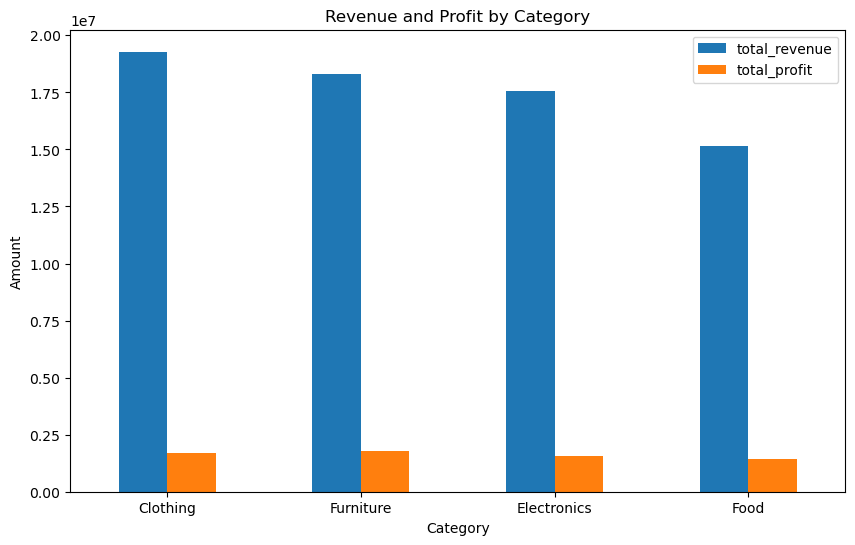

In [84]:
#VISUALIZATION
# {revenue & profit by category}
category_pref[['total_revenue','total_profit']].plot(
    kind ='bar',
    figsize=(10,6)
)
plt.title('Revenue and Profit by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=360)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Furniture'),
  Text(2, 0, 'Electronics'),
  Text(3, 0, 'Food')])

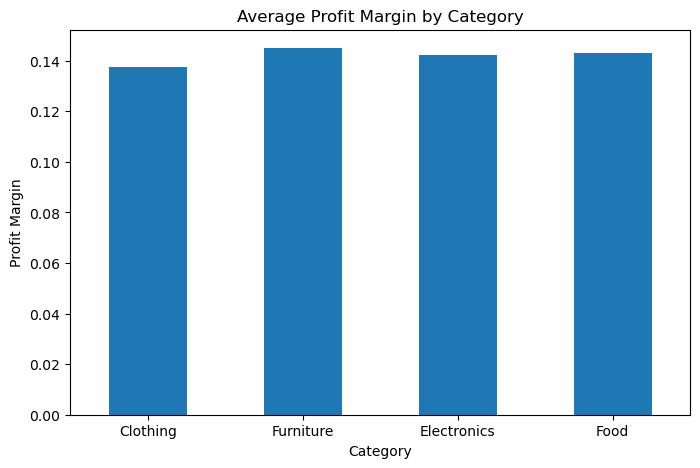

In [85]:
# {Profit Margin by Category}
category_pref['avg_profit_margin'].plot(
    kind ='bar',
    figsize =(8,5)
)
plt.title('Average Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=360)

C:\Users\vikas kumar\AppData\Local\Temp\ipykernel_47120\3946095316.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('discount_bucket')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-10%'),
  Text(1, 0, '10-20%'),
  Text(2, 0, '20-30%'),
  Text(3, 0, '30-50%'),
  Text(4, 0, '50%+')])

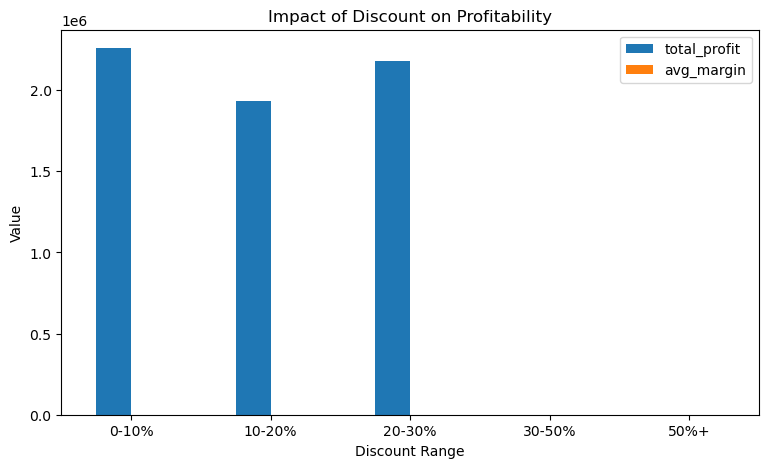

In [87]:
discount_perf = (
    df_analysis
    .groupby('discount_bucket')
    .agg(
        total_profit=('profit', 'sum'),
        avg_margin=('profit_margin', 'mean')
    )
)
discount_perf.plot(kind='bar',figsize=(9,5))
plt.title('Impact of Discount on Profitability')
plt.xlabel('Discount Range')
plt.ylabel('Value')
plt.xticks(rotation=360)

Text(0, 0.5, 'Amount')

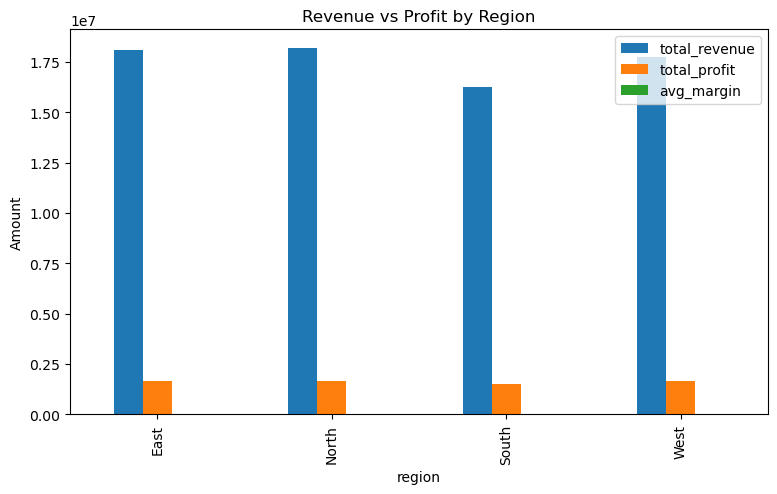

In [88]:
region_pref.plot(kind='bar', figsize=(9,5))
plt.title('Revenue vs Profit by Region')
plt.ylabel('Amount')

# Business Insights 

## 1. Overall Business Performance

Total revenue is ₹70.31M with a total profit of ₹6.47M.

The overall average profit margin is ~14.2%, indicating the business is profitable but margin optimization is possible.

Insight:
Business is not in loss , but margins is moderate , there is scope of improvement.

## 2. Sales & Discount Behavior

Average sale value is ₹5,019 with an average discount of 15%.

Maximum discount observed is 30%, while minimum is 0%.

Higher discounts do not necessarily result in proportionally higher profitability.

Insight:Discounting is controlled (mostly ≤30%), but discount effectiveness varies.

## 3. Category-wise Performance
Category	 Avg Profit Margin
Furniture	 14.5% (Highest)
Food	     14.3%
Electronics	 14.2%
Clothing	 13.8% (Lowest)

Insight:
All categories generate similar revenue.
Furniture is the most profitable category, while Clothing has the lowest margin.

~ High revenue ≠ highest profitability.

## 4. Discount Bucket Analysis
Discount Range	Avg Profit Margin
0–10%	        13.5%
10–20%	        14.6% (Best)
20–30%	        14.4%

Insight:
10–20% discount range delivers the highest profit margin.
Extremely high discount ranges (30%+) are not contributing to revenue or profit.

## 5. Regional Performance
Region	Avg Profit Margin
South	14.9% (Best)
West	14.4%
North	13.9%
East	13.8%

Insight:
All regions perform consistently.
South region is the most profitable, despite not having the highest revenue.


# BUSINESS DECISIONS / RECOMMENDATIONS
## 1. Optimize Discount Strategy

~ Focus discounts in the 10–20% range, where profitability is highest.

~ Avoid unnecessary higher discounts since they do not improve margins.

## 2. Improve Low-Margin Categories

~ Review Clothing category pricing, costs, or promotions.

~ Learn from Furniture category’s pricing and cost structure.

## 3. Regional Strategy Optimization

~ Replicate South region strategies (logistics, pricing, operations) in other regions.

~ Maintain consistent pricing, as no region shows extreme underperformance.

## 4. Profit-Focused Decision Making

~ Business should prioritize profit margin along with revenue, not revenue alone.

~ Small margin improvements can significantly increase overall profit.